In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('../DataPaper/data/transcript_tags1_clean.csv')
df_tour = pd.read_csv('../DataPaper/data/scores_surveys.csv')

In [24]:
df.head()

,Unnamed: 0,text,label,username,round
0,0,This is a response to why we think office to o...,introduction,gabbishilcusky,round5
1,1,So I think that opening Government substantiat...,rebuttal1,gabbishilcusky,round5
2,2,Okay. So in response to closing Governement.I ...,rebuttal2,gabbishilcusky,round5
3,3,Dennis's gave us an example of how in the hobb...,constructive1,gabbishilcusky,round5
4,4,ecause recognize the people who decide what ca...,constructive2,gabbishilcusky,round5


In [20]:
df_tour = df_tour[['round','username','score']].dropna()

In [21]:
df_tour['round'] = df_tour['round'].apply(lambda x: 'round'+str(int(x)))
df_tour.head()

,round,username,score
0,round2,AdiJK,78.0
1,round2,jmorgan,76.0
2,round2,jbotkin1,81.0
3,round2,Bfalkofs,77.0
4,round2,aabruzz1,79.0


In [25]:
df_trans = df.merge(df_tour, on = ['username','round'], how='left').drop('Unnamed: 0',axis=1)

In [26]:
df_trans.head()

,text,label,username,round,score
0,This is a response to why we think office to o...,introduction,gabbishilcusky,round5,78.0
1,So I think that opening Government substantiat...,rebuttal1,gabbishilcusky,round5,78.0
2,Okay. So in response to closing Governement.I ...,rebuttal2,gabbishilcusky,round5,78.0
3,Dennis's gave us an example of how in the hobb...,constructive1,gabbishilcusky,round5,78.0
4,ecause recognize the people who decide what ca...,constructive2,gabbishilcusky,round5,78.0


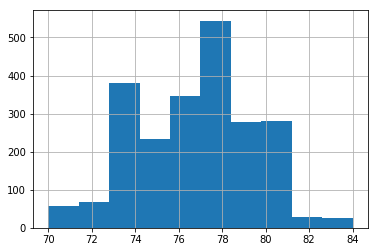

In [34]:
df_trans['score'].hist()
plt.show()

In [35]:
score_class = {70:1,71:2,72:3,73:4,74:5,75:6,76:7,77:8,78:9,
               79:10,80:11,81:12,82:13,83:14,84:15}

In [37]:
df_trans = df_trans.dropna()

In [38]:
df_trans['score_class'] = df_trans['score'].apply(lambda x: score_class[x])

In [42]:
df_trans = pd.read_csv('../DataPaper/data/ann_transcript_score_class.csv')

In [56]:
df_cons = df_trans[df_trans['label'].str.contains('constructive')].reset_index()
df_cons = df_cons.drop(['Unnamed: 0','index'],axis = 1)

In [64]:
df_cons.groupby(['score_class']).count()

,text,label,username,round,score
score_class,,,,,
1,2,2,2,2,2
2,19,19,19,19,19
3,15,15,15,15,15
4,59,59,59,59,59
5,62,62,62,62,62
6,71,71,71,71,71
7,151,151,151,151,151
8,135,135,135,135,135
9,66,66,66,66,66


In [58]:
dftest_list =[]
dftrain_list = []
for score in df_cons['score_class'].unique():
    test = df_cons[df_cons['score_class']==score].sample(frac = 1/5)
    train = df_cons[df_cons['score_class']==score].drop(test.index)
    dftest_list.append(test)
    dftrain_list.append(train)

In [59]:
dftest_cons = pd.concat(dftest_list)
dftrain_cons = pd.concat(dftrain_list)

In [62]:
dftest_cons['score_class'].unique()

array([ 9,  7, 10, 11,  4,  8, 13,  6, 15,  5,  3, 12,  2])

In [65]:
dftrain_cons['score_class'].unique()

array([ 9,  7, 10, 11,  4,  8, 13,  6, 15,  5,  3, 12,  2,  1, 14])

In [66]:
dftest_cons.shape

(158, 6)

In [79]:
dftest_cons =dftest_cons.reset_index()

In [68]:
dftrain_cons.shape

(643, 6)

In [80]:
for i in dftest_cons.index:
    text = dftest_cons['text'].iloc[i].split(' ')
    if len(text)>512:
        print(i)

70
86


In [82]:
dftest_cons = dftest_cons.drop([70,86])

In [83]:
dftest_cons.to_csv('data/ann_transcript_score_class_test.csv')
dftrain_cons.to_csv('data/ann_transcript_score_class_train.csv')